In [3]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_36050ddb3c4f40a18a7f066830ed7d30(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_5e8e87bcb2a327d9c700afece746508f6c525227','domain': {'id': 'acc42c12cff74f9fb5e0ce17640fc696'},
            'password': 'UL!Q4asjt8[I]lLu'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_36050ddb3c4f40a18a7f066830ed7d30('FinalProject', '2008.csv'))
df_data_1.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df_data_1.shape

(7009728, 29)

In [5]:
df_data_1.UniqueCarrier=df_data_1.UniqueCarrier.astype('category')
df_data_1.Origin = df_data_1.Origin.astype('category')
df_data_1.Dest = df_data_1.Dest.astype('category')   
df_data_1.CancellationCode = df_data_1.CancellationCode.astype('category')
df_data_1.TailNum = df_data_1.TailNum.astype('category')

In [6]:
months={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}
df_data_1['MonthName'] = df_data_1['Month'].apply(lambda m: months[m])
day_of_week = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
  }
df_data_1['DayofweekName'] = df_data_1['DayOfWeek'].apply(lambda d: day_of_week[d])

In [7]:
df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_36050ddb3c4f40a18a7f066830ed7d30('FinalProject', 'Carriers.csv'))

In [16]:
df_data_2.head()

,UniqueCarrier,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [17]:
df3 = df_data_1.merge(df_data_2, on='UniqueCarrier', how='inner', suffixes=('_1', '_2'))

In [19]:
df3.shape

(7009728, 32)

In [20]:
df3.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MonthName,DayofweekName,Description
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,NaN,0,NaN,NaN,NaN,NaN,NaN,01- January,Thursday,Southwest Airlines Co.
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,NaN,0,NaN,NaN,NaN,NaN,NaN,01- January,Thursday,Southwest Airlines Co.
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,NaN,0,NaN,NaN,NaN,NaN,NaN,01- January,Thursday,Southwest Airlines Co.
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,NaN,0,NaN,NaN,NaN,NaN,NaN,01- January,Thursday,Southwest Airlines Co.
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,NaN,0,2.0,0.0,0.0,0.0,32.0,01- January,Thursday,Southwest Airlines Co.


In [23]:
Airlines_count = df3['Description'].value_counts()

In [24]:
import time
import datetime 
from datetime import datetime
%matplotlib inline
from matplotlib import pyplot as plt
import csv
import numpy as np
import pandas as pd
import seaborn as sb

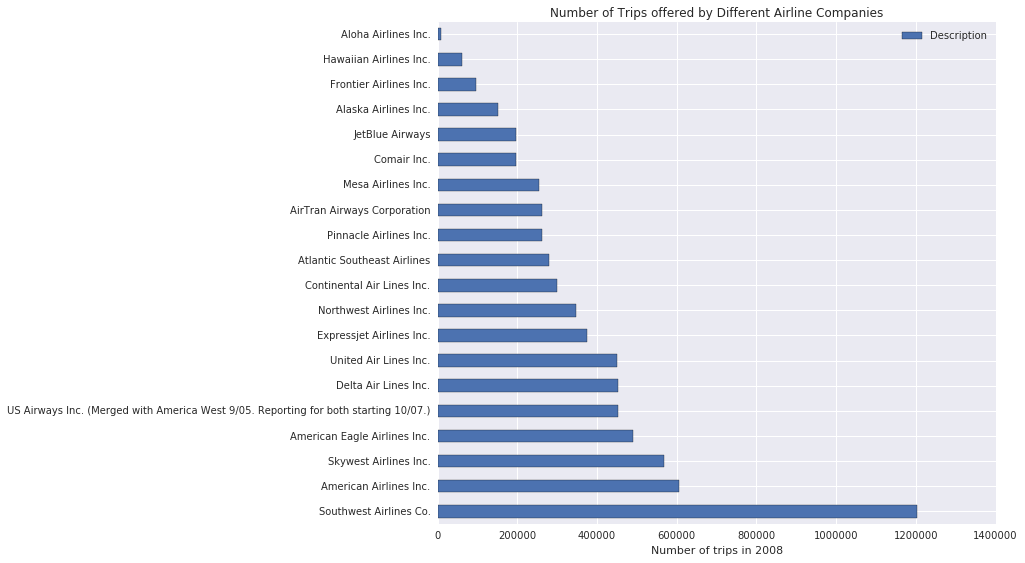

In [28]:
Airlines_count.plot(kind='barh', stacked=True,subplots=True,figsize=(10,9),legend=True);
plt.xlabel('Number of trips in 2008')
plt.title('Number of Trips offered by Different Airline Companies')

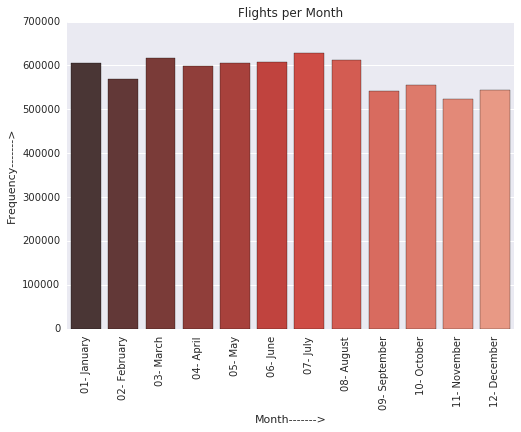

In [33]:
frequent_month = df3[['MonthName']].groupby('MonthName').size().reset_index()
frequent_month.columns = ['MonthName', 'COUNT']

ax = sb.barplot(x = "MonthName", y = "COUNT",
           data = frequent_month, palette = "Reds_d")
plt.title('Flights per Month')
plt.xlabel('Month------->')
plt.ylabel('Frequency------->')
plt.xticks(rotation='vertical')
plt.show()